# Assignment: Scale-free networks

## 1. Implement BA algorithm
For this assignment you will be implementing the BA algorithm from the reading (see [Barabasi Ch 5.3](http://barabasi.com/networksciencebook/)). Create a function that takes `n` the number of nodes for the graph, and `m_o` the initial number of nodes, as arguments and returns a networkx graph with a scale-free degree distribution.

The first step is figuring out how to do "preferential attachment" based on the degree of existing nodes. A brute-force way to do this is creating a huge list with duplicated items. Say, node 1's degree is 6, node 2's degree is 3, and node 3's degree is 2. (This is not a 'graphical' sequence. But for the sake of simplicity let's just assume that.) Then, we can create the following list to *preferentially sample* nodes from the network. 

In [1]:
alist = [1,1,1,1,1,1,2,2,2,3,3]

1 is repeated 6 times, 2 is repeated 3 times, and so on. Now if we randomly sample from this list, we will be three times more like to sample node 1 than node 3!

In [2]:
import random

random.sample(alist, 1)

[1]

So, if you can maintain this list for your network, you can implement preferential attachment. Simply update this list whenever you add an edge! 

An alternative way is using `numpy`'s sampling method. If you run the following cell, the documentation for the [`np.random.choice`](http://docs.scipy.org/doc/numpy/reference/generated/numpy.random.choice.html) function will appear at the bottom. 

In [3]:
import numpy as np

np.random.choice?

It accepts `p` parameter and you can specifies the probability of each item in the list! So instead of creating

In [4]:
alist = [1,1,1,1,1,1,2,2,2,3,3]

You can do

In [5]:
nodes = [1,2,3]
degrees = [6,3,2]
sum_degrees = sum(degrees)
node_probs = [x*1/sum_degrees for x in degrees] 
node_probs

[0.5454545454545454, 0.2727272727272727, 0.18181818181818182]

In [6]:
np.random.choice(nodes, p=node_probs)

1

or sample two nodes from the list. 

In [7]:
np.random.choice(nodes, 2, replace=False, p=node_probs)

array([2, 1])

Now you're ready to implement the BA algorithm! If it's difficult, start with m=1. This is much simpler. Then generalizing to m!=1 is not that complicated. 

In [8]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [9]:
def barabasi_albert_graph(n, m_o, m=1):
    # Initial network of m_o nodes
    G = nx.empty_graph(m_o)
    
    # while network has less than n nodes, 
    # 1. preferentially sample m nodes from the network,
    # 2. create a new node, 
    # 3. and connect the new node to the m selected nodes. 
    while (len(G.nodes()) < n ):
        #node_probs=0
        nodes = G.nodes()
        #print(nodes)
        #print(G.degree())
        degrees = list(dict(G.degree()).values())
        #print(degrees)
        sum_degrees = sum(degrees)
        #print(sum_degrees)
        if (sum_degrees != 0):
            node_probs = [x*1/sum_degrees for x in degrees] 
        else:
            node_probs = [1 / len(G.nodes()) for x in degrees]  ## intially all nodes have same probability
        #print(node_probs)
        sample = np.random.choice(G.nodes(), m, replace=False, p=node_probs)
        #print(sample)
        new_node = len(G.nodes())+1
        G.add_node(new_node)
        [G.add_edge(new_node,v) for v in sample ]
        #print(G.edges)
    plt.figure()
    nx.draw(G)
    plt.show()
    pass
    return G

## 2. BA graph analysis
Test your algorithm by creating a graph with `N = 1200` and `m_o = 7`. Calculate (and print) the average shortest path length of the graph:

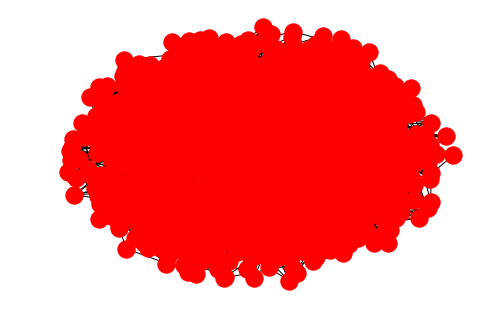

Name: 
Type: Graph
Number of nodes: 1200
Number of edges: 8351
Average degree:  13.9183


In [10]:
# Your code here
G = barabasi_albert_graph(n=1200, m_o=7, m=7)
print(nx.info(G))

In [11]:
nx.average_shortest_path_length(G)

2.7791326105087575

Calculate (and print) the average clustering coefficient of the graph:

In [12]:
# Your code here
nx.average_clustering(G)

0.0437546103555556

The [cumulative distribution function (CDF) and complementary cumulative distribution function (CCDF)](https://en.wikipedia.org/wiki/Cumulative_distribution_function) are among the most direct ways to identify a power-law-like distribution. Plot the CCDF of the graph's degree distribution. (Hint: you can look at [this post](https://stackoverflow.com/questions/24575869/read-file-and-plot-cdf-in-python). CCDF is just the reverse of CDF.)

In [13]:
def ccdf(data):
    ## Function referrence - https://stackoverflow.com/questions/24575869/read-file-and-plot-cdf-in-python
    data_size=len(data)

    # Set bins edges
    data_set=sorted(set(data))
    bins=np.append(data_set, data_set[-1]+1)

    # Use the histogram function to bin the data
    counts, bin_edges = np.histogram(data, bins=bins, density=False)

    counts=counts.astype(float)/data_size

    # Find the cdf
    cdf = np.cumsum(counts)
    ccdf = 1 - cdf

    # Plot the cdf
    plt.plot(bin_edges[0:-1], ccdf,linestyle='--', marker="o", color='b')
    plt.ylim((0,1))
    plt.ylabel("CCDF")
    plt.grid(True)

    plt.show()

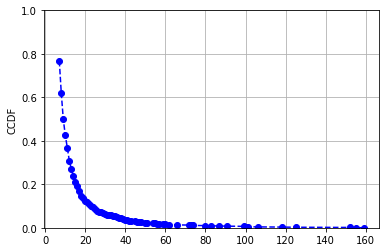

In [14]:
import matplotlib.pyplot as plt
%matplotlib inline

# Your code here
degree_sequence = sorted([d for n, d in G.degree()], reverse=True) 
ccdf(degree_sequence)

## 3. BA and ER comparison
Now lets compare the scale-free and random graphs. Create a random graph with the same number of nodes and about the same number of edges, then calculate the average shortest path length of that graph:

Name: 
Type: Graph
Number of nodes: 1200
Number of edges: 5769
Average degree:   9.6150


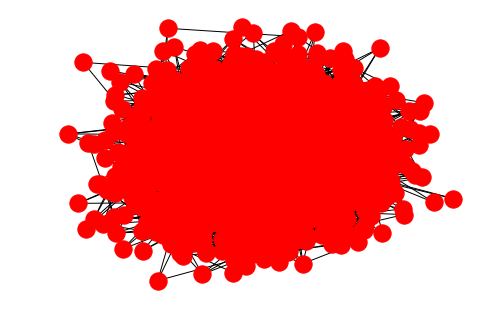

In [15]:
# Your code here
random_graph = nx.erdos_renyi_graph(1200, 0.008, seed=42)
nx.draw(random_graph)
print(nx.info(random_graph))

In [16]:
nx.average_shortest_path_length(random_graph)

3.390095913261051

Calculate (and print) the average clustering coefficient of the graph:

In [17]:
# Your code here
nx.average_clustering(random_graph)

0.006847474456801079

Now plot the CCDF of the degree distribution of the random graph:

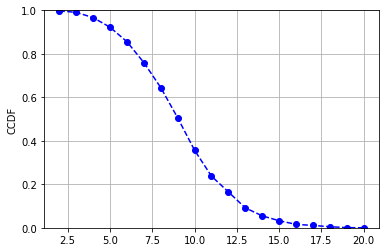

In [18]:
# Your code here
degree_sequence_random = sorted([d for n, d in random_graph.degree()], reverse=True) 
ccdf(degree_sequence_random)

How do the average shortest path lengths, average clustering coefficients, and degree distributions between the graphs compare?

- **Average shortest path length**
    It is very similar in both the graphs. 2.79 for BA graph and 3.39 for random graph
- **Clustering coefficient**
    There is significanct differenr here. It is 0.04 for BA graph and 0.006 for random graph. This shows that BA graph is much more dnese than random graph. It also suggests presence of hubs in BA graph.
- **Degree distribution**
    We can clearly see power-law in degree distribution of BA graph. On the other hand, random graph has much more even degree distribution. This is also indicator that average degree of random graph is less and there are no hubs present. 

## 4. Preferential attachment without using the degree

As explained in a video, it is possible to achieve the linear preferential attachment without calculating the degree by using the principle that we learned in the friendship paradox. Implement this version and see whether you can get a power-law degree distribution.  

Helpful page:
- https://networkx.github.io/documentation/stable/reference/classes/generated/networkx.Graph.edges.html

In [19]:
# your code here

def alternate_barabasi_albert_graph(n, m_o,m=1):
    # Initial network of m_o nodes
    G = nx.empty_graph(m_o)
    
    # while network has less than n nodes, 
    # 1. select random edge
    # 2. create a new node, 
    # 3. and connect the new node to nodes of selected edge 
    while (len(G.nodes()) < n ):
        nodes = G.nodes()       
        new_node = len(G.nodes())+1
        G.add_node(new_node)
        if (len(G.edges())==0):
            [G.add_edge(new_node,v) for v in nodes ] # initial connect if nodes are isolated
        else :
            # follow nodes of selected edge and connect with new node
            # this will follow friendship paradox and also get clustering effect
            edges = list(G.edges())
            sample = random.choice(list(G.edges()))
            G.add_edge(new_node,sample[0])
            G.add_edge(new_node,sample[1])
    plt.figure()
    nx.draw(G)
    plt.show()
    pass
    return G

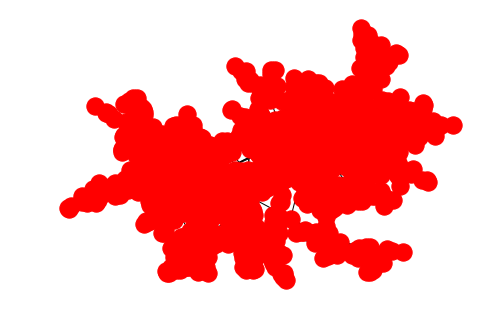

Name: 
Type: Graph
Number of nodes: 1200
Number of edges: 2389
Average degree:   3.9817


In [20]:
GA = alternate_barabasi_albert_graph(n=1200, m_o=7)
print(nx.info(GA))

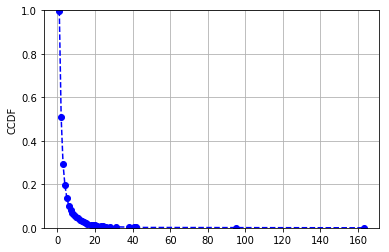

In [21]:
degree_sequence = sorted([d for n, d in GA.degree()], reverse=True) 
ccdf(degree_sequence)

Above graph shows alternative approach to build BA graph where we don't need to calculate probabilities of all the nodes. We can select random edge and connect to its nodes. We still get power-law degree distribution and a scale free network